Radon Data of Northern Ireland.
Source of data: Environmental Protection Agency, Ireland (EPA) Geoportal https://gis.epa.ie/Home

In [1]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt

In [2]:
from shapely.geometry import Point, LineString, Polygon

In [3]:
import rtree # Import retree package to upports geospatial join¶

In [4]:
radon = pd.read_csv('data_files\RadonNI.csv')

View the DataFrame
Data Source: https://www.bgs.ac.uk/datasets/radon-data-indicative-atlas-of-radon/

In [5]:
radon.head()

,Tile,class,x,y
0,D1053,1,310500,453500
1,D1153,1,311500,453500
2,D1253,1,312500,453500
3,D0952,2,309500,452500
4,D1052,2,310500,452500


In [6]:
radon.tail

<bound method NDFrame.tail of         Tile  class       x       y
0      D1053      1  310500  453500
1      D1153      1  311500  453500
2      D1253      1  312500  453500
3      D0952      2  309500  452500
4      D1052      2  310500  452500
...      ...    ...     ...     ...
14715  J2710      5  327500  310500
14716  J2810      4  328500  310500
14717  J2910      4  329500  310500
14718  J2609      4  326500  309500
14719  J2709      4  327500  309500

[14720 rows x 4 columns]>

In [7]:
radon.tail(10)

,Tile,class,x,y
14710,H9010,3,290500,310500
14711,H9110,3,291500,310500
14712,J2410,3,324500,310500
14713,J2510,3,325500,310500
14714,J2610,5,326500,310500
14715,J2710,5,327500,310500
14716,J2810,4,328500,310500
14717,J2910,4,329500,310500
14718,J2609,4,326500,309500
14719,J2709,4,327500,309500


In [8]:
radon["class"]

0        1
1        1
2        1
3        2
4        2
        ..
14715    5
14716    4
14717    4
14718    4
14719    4
Name: class, Length: 14720, dtype: int64

In [9]:
#view
radon[["x", "y"]]

,x,y
0,310500,453500
1,311500,453500
2,312500,453500
3,309500,452500
4,310500,452500
...,...,...
14715,327500,310500
14716,328500,310500
14717,329500,310500
14718,326500,309500


In [10]:
radon.loc[[radon["class"].idxmax(), radon["class"].idxmin()]]

,Tile,class,x,y
89,D1643,6,316500,443500
0,D1053,1,310500,453500


In [11]:
import math
import statistics
import numpy as np
import scipy.stats

Descriptive Statistics, source: https://towardsdatascience.com/a-quick-guide-on-descriptive-statistics-using-pandas-and-seaborn-2aadc7395f32

In [12]:
radon.info() #summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14720 entries, 0 to 14719
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tile    14720 non-null  object
 1   class   14720 non-null  int64 
 2   x       14720 non-null  int64 
 3   y       14720 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 460.1+ KB


In [13]:
radon.shape # 868 rows and 6 columns

(14720, 4)

In [56]:
radon.columns  # columns  

Index(['OBJECTID', 'PERCENT', 'RadonText', 'X', 'Y', 'geometry'], dtype='object')

In [14]:
average = radon['class'].mean() # calculate mean
print(average)

2.682540760869565


In [15]:
med = radon['class'].median()
print(med)

2.0


In [16]:
radon[radon['class'] > 40]

,Tile,class,x,y


# Measure of Variation

In [17]:
SD = radon['class'].std() # standard deviation (SD)
print(SD)

1.5419384184370073


# show the numerical data distribution

In [18]:
# deactivated

# import seaborn as sns
# %matplotlib inline

# sns.set(style="whitegrid")
# ax = sns.boxplot(x='class', data=radon, orient="v")

In [19]:
import matplotlib.pyplot as plt
import cartopy as cp
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs

In [20]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

C:\Users\asuwa\anaconda3\envs\RadonNI\lib\site-packages\pyproj\crs\crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


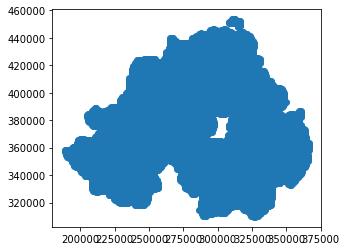

In [21]:
pts = [Point(row['x'], row['y']) for id, row in radon[['x', 'y']].iterrows()]
pts = gpd.GeoSeries(pts, crs='+init=epsg:29902')
pts.plot();

# Make the plotting interactive

In [22]:
plt.ion()

In [23]:
import numpy as np # we rename it in the session as `np` by convention
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

# Use "% matplotlib inline" to  render the figure in a notebook. To set this up, before any plotting or import of matplotlib is performed you must execute the %matplotlib magic command. This performs the necessary behind-the-scenes setup for IPython to work correctly hand in hand with matplotlib; it does not, however, actually execute any Python import commands, that is, no names are added to the namespace.

# zip is an iterator, so we use list to create something that pandas can use.

In [24]:
radon['geometry'] = list(zip(radon['x'], radon['y']))

# using the 'apply' method of the dataframe,
# turn the coordinates column
# into points (instead of a tuple of lat, lon coordinates).
# NB: Point takes (x, y) coordinates

In [25]:
radon['geometry'] = radon['geometry'].apply(Point)

In [26]:
radon

,Tile,class,x,y,geometry
0,D1053,1,310500,453500,POINT (310500 453500)
1,D1153,1,311500,453500,POINT (311500 453500)
2,D1253,1,312500,453500,POINT (312500 453500)
3,D0952,2,309500,452500,POINT (309500 452500)
4,D1052,2,310500,452500,POINT (310500 452500)
...,...,...,...,...,...
14715,J2710,5,327500,310500,POINT (327500 310500)
14716,J2810,4,328500,310500,POINT (328500 310500)
14717,J2910,4,329500,310500,POINT (329500 310500)
14718,J2609,4,326500,309500,POINT (326500 309500)


In [27]:
gradon = gpd.GeoDataFrame(radon)

In [28]:
# this sets the coordinate reference system to epsg:29902

In [29]:
gradon.set_crs("EPSG:29902", inplace=True)

,Tile,class,x,y,geometry
0,D1053,1,310500,453500,POINT (310500.000 453500.000)
1,D1153,1,311500,453500,POINT (311500.000 453500.000)
2,D1253,1,312500,453500,POINT (312500.000 453500.000)
3,D0952,2,309500,452500,POINT (309500.000 452500.000)
4,D1052,2,310500,452500,POINT (310500.000 452500.000)
...,...,...,...,...,...
14715,J2710,5,327500,310500,POINT (327500.000 310500.000)
14716,J2810,4,328500,310500,POINT (328500.000 310500.000)
14717,J2910,4,329500,310500,POINT (329500.000 310500.000)
14718,J2609,4,326500,309500,POINT (326500.000 309500.000)


In [30]:
print(gradon)

        Tile  class       x       y                       geometry
0      D1053      1  310500  453500  POINT (310500.000 453500.000)
1      D1153      1  311500  453500  POINT (311500.000 453500.000)
2      D1253      1  312500  453500  POINT (312500.000 453500.000)
3      D0952      2  309500  452500  POINT (309500.000 452500.000)
4      D1052      2  310500  452500  POINT (310500.000 452500.000)
...      ...    ...     ...     ...                            ...
14715  J2710      5  327500  310500  POINT (327500.000 310500.000)
14716  J2810      4  328500  310500  POINT (328500.000 310500.000)
14717  J2910      4  329500  310500  POINT (329500.000 310500.000)
14718  J2609      4  326500  309500  POINT (326500.000 309500.000)
14719  J2709      4  327500  309500  POINT (327500.000 309500.000)

[14720 rows x 5 columns]


In [31]:
radon = gpd.read_file('data_files/RadonNI_conda.shp')

In [32]:
counties = gpd.read_file('data_files/Counties1.shp')
print(counties.head())

   COUNTY_ID   CountyName    Area_SqKM  OBJECTID  \
0          6       TYRONE  3265.796622         1   
1          1       ANTRIM  3097.847750         2   
2          2       ARMAGH  1327.228438         3   
3          4    FERMANAGH  1850.832538         4   
4          5  LONDONDERRY  2118.316853         5   

                                            geometry  
0  POLYGON ((603659.943 6089544.483, 603665.021 6...  
1  MULTIPOLYGON (((697048.708 6049234.680, 697047...  
2  POLYGON ((671301.846 6043407.459, 671437.484 6...  
3  POLYGON ((584348.238 6051633.297, 584365.882 6...  
4  POLYGON ((648345.446 6119413.614, 648346.157 6...  


<AxesSubplot:>

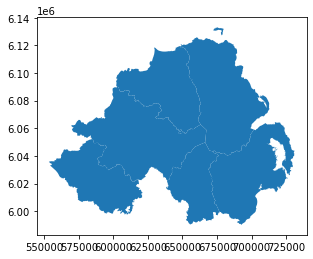

In [33]:
counties.plot()

<AxesSubplot:>

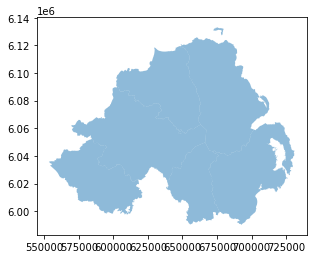

In [34]:
counties.plot(alpha=0.5) # change transparency

C:\Users\asuwa\anaconda3\envs\RadonNI\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


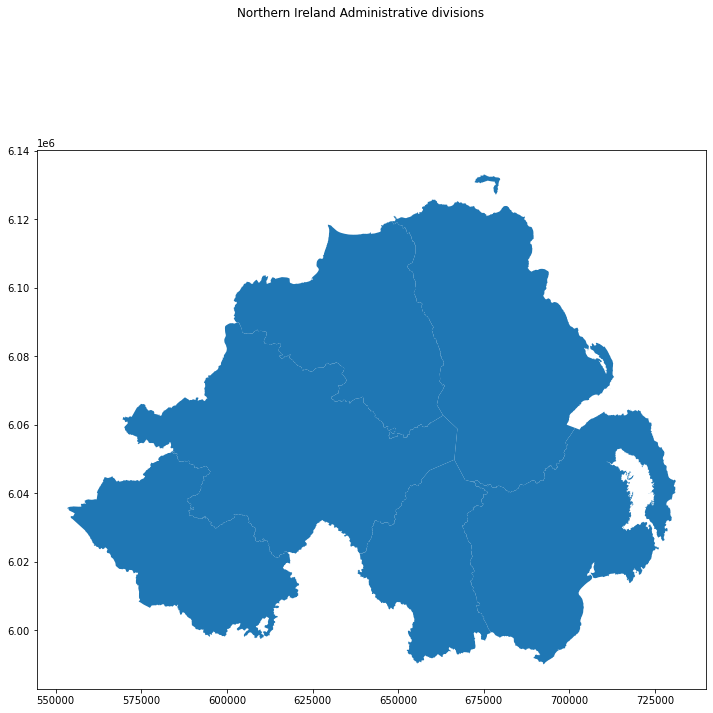

In [35]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = counties.plot(axes=ax)
f.suptitle('Northern Ireland Administrative divisions')
plt.show()

In [36]:
counties.crs

<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

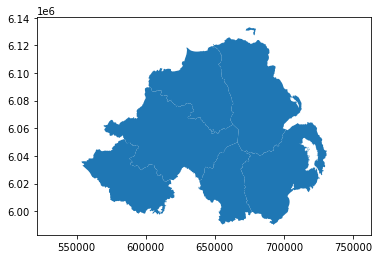

In [37]:
counties.to_crs(epsg=29902).plot()
lims = plt.axis('equal')

In [38]:
rows, cols = counties.shape # get the number of rows, columns in the table
print('Number of features: {}'.format(rows))

Number of features: 6


In [39]:
counties.columns

Index(['COUNTY_ID', 'CountyName', 'Area_SqKM', 'OBJECTID', 'geometry'], dtype='object')

In [40]:
counties.head()

,COUNTY_ID,CountyName,Area_SqKM,OBJECTID,geometry
0,6,TYRONE,3265.796622,1,"POLYGON ((603659.943 6089544.483, 603665.021 6..."
1,1,ANTRIM,3097.847750,2,"MULTIPOLYGON (((697048.708 6049234.680, 697047..."
2,2,ARMAGH,1327.228438,3,"POLYGON ((671301.846 6043407.459, 671437.484 6..."
3,4,FERMANAGH,1850.832538,4,"POLYGON ((584348.238 6051633.297, 584365.882 6..."
4,5,LONDONDERRY,2118.316853,5,"POLYGON ((648345.446 6119413.614, 648346.157 6..."


In [41]:
divisions = counties['CountyName'].tolist() # Get a list of a particular column (Counties)
print(divisions)

['TYRONE', 'ANTRIM', 'ARMAGH', 'FERMANAGH', 'LONDONDERRY', 'DOWN']


In [42]:
gcounties = gpd.GeoDataFrame(counties)

In [43]:
# Radon data within counties
radon_counties = gpd.sjoin(gradon, gcounties, how="inner", op='within')

In [44]:
radon_counties.head()

,Tile,class,x,y,geometry,index_right,COUNTY_ID,CountyName,Area_SqKM,OBJECTID


In [45]:
radon_counties

,Tile,class,x,y,geometry,index_right,COUNTY_ID,CountyName,Area_SqKM,OBJECTID


In [46]:
radon_counties.shape

(0, 10)

In [47]:
 from shapely.geometry import MultiPolygon

In [48]:
radon.crs

<Projected CRS: EPSG:29901>
Name: OSNI 1952 / Irish National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - Northern Ireland (Ulster) - onshore.
- bounds: (-8.18, 53.96, -5.34, 55.36)
Coordinate Operation:
- name: Irish National Grid
- method: Transverse Mercator
Datum: OSNI 1952
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [49]:
gradon.crs

<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

In [50]:
counties.crs

<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

In [51]:
radon.crs

<Projected CRS: EPSG:29901>
Name: OSNI 1952 / Irish National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - Northern Ireland (Ulster) - onshore.
- bounds: (-8.18, 53.96, -5.34, 55.36)
Coordinate Operation:
- name: Irish National Grid
- method: Transverse Mercator
Datum: OSNI 1952
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [52]:
counties.crs

<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

In [53]:
join = gpd.sjoin(counties, gradon, how='inner', op="within") # perform the spatial join
join # show the joined table

,COUNTY_ID,CountyName,Area_SqKM,OBJECTID,geometry,index_right,Tile,class,x,y


In [54]:
print(join)
join.to_file('join.shp')

Empty GeoDataFrame
Columns: [COUNTY_ID, CountyName, Area_SqKM, OBJECTID, geometry, index_right, Tile, class, x, y]
Index: []


ValueError: Cannot write empty DataFrame to file.

In [ ]:
f, ax = plt.subplots(1)
# Plot point in light grey
for poly in counties['geometry']:
    gpd.plotting.plot_multipolygon(ax, poly, color='grey', alpha=0.25)
# Overlay railway tunnels on top in strong green
for point in radon['geometry']:
    gpd.plotting.plot_multipoint(ax, poly, color='grey', linewidth=3)